In [2]:
def arrayfaixa(a,b,c):
  d=[a]
  if b>a:
    while b>a :
      a=a+c
      d.append(a)
  if b<a:
    while b<a :
      a=a-c
      d.append(a)
  if len(d)>0:
   d.pop(-1)
  return(d)

# FSC7114 - Introdução à Física Computacional
## Projeto final
### Nome: Seu Nome

## Integração numérica

Calcular uma integral nem sempre é uma tarefa fácil. Algumas integrais, por outro lado, são impossíveis de serem caculadas analiticamente. Neste caso, elas devem ser resolvidas numericamente. Isso envolve algum tipo de discretização.

Considere a própria definição de integral,

$$
I = \int_a^b f(x)\,\mathrm{d}x = \lim_{\Delta x_i \to 0} \sum_i f(x_i) \Delta x_i.
$$

A integral definida é a área sob a curva, a qual aproximamos de retângulos muito pequenos. Veja a figura abaixo.

CC BY-SA 3.0 [IkamusumeFan](https://en.wikipedia.org/wiki/Integral#/media/File:Riemann_Integration_and_Darboux_Lower_Sums.gif)

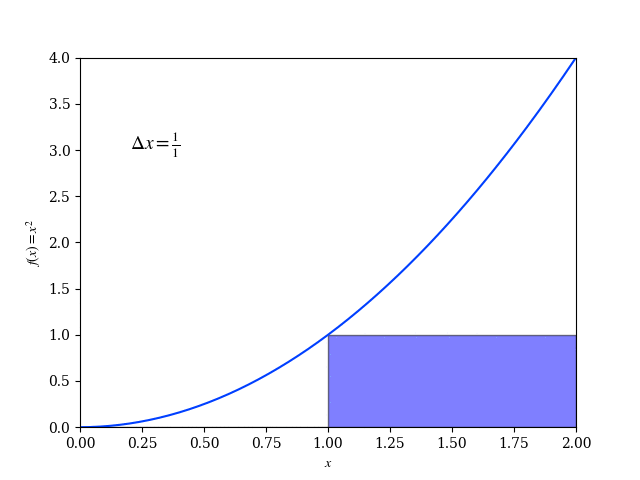

Em geral escolhemos um intervalo $\Delta x_i$ constante, que vamos chamar de $h$. Se os limites de integração são $a$ e $b$, com $N$ intervalos, temos que

$$
\Delta x_i = h = \frac{b - a}{N}.
$$

Neste caso, é fácil ver que

$$
x_i = a + i h.
$$

Desta forma, podemos escolher um número muito grande de intervalos, e a nossa integral pode ser  calculada de forma aproximada. Isto é,

\begin{align}
I &= \int_a^b f(x)\,\mathrm{d}x \cong \sum_{i=0}^{N-1} f(x_i) \Delta x_i \\
I &\cong \sum_{i=0}^{N-1} f(x_i) h = h \sum_{i=0}^{N-1} f(x_i)
\end{align}

### Aplicação prática: função erro

Vamos estudar a função erro, que aparece frequentemente em estatística. Ela é dada por

$$
\mathrm{erf}(z) = \frac{2}{\sqrt{\pi}} \int_0^z e^{-x^2}\, \mathrm{d}x,
$$

Primeiramente, vamos calcular o valor da função erro quando $z = 1$, com $N = 5000$.

*Gabarito*: $\mathrm{erf}(z=1) \cong 0.8427$.

In [3]:

import numpy as np
import matplotlib.pyplot as plt
a=0
b=1
N=5000

# dx:
h=(b-a)/N

x=arrayfaixa(a,b,h) #lista x+dx
x.pop(-1)

def f(x):
  return np.e**(-x**2)

Y=[]
# f(x) aplicado a lista:
for i in x:
  Y.append(f(i))

I=sum(Y)*h
print(I*2/(np.sqrt(np.pi)))


0.84285513884881


Essa função é bastante útil, assim, vamos definir uma função para poder utilizá-la futuramente.

*Gabarito*: defina uma função com uma assinatura do tipo

```
def erf(z):
    # Cálculo da integral.
    return valor
```

In [4]:
def erf(z):
  I=sum(Y)*h
  return I*2/(np.sqrt(np.pi))
print(erf(1))

0.84285513884881


In [5]:

def f(x):
  return np.e**(-x**2)

def erf(z):
  N=5000
  Y=[]
  h=z/N
  x=arrayfaixa(0,z,h)
  if len(x)>0:
    x.pop(-1)
  for i in x:
    Y.append(f(i))
  I=sum(Y)*h
  return I*2/(np.sqrt(np.pi))


Vamos testar a nossa função, calculando o mesmo valor testado acima.

*Gabarito*: $\mathrm{erf}(z=1) \cong 0.8427$.

In [6]:
erf(1)

0.84285513884881

### Gráfico da  função erro

Vamos calcular $\mathrm{erf}(z)$ para valores igualmente espaçados de $z$, tal que $-3 \leq z \leq 3$. Vamos manter os valores de $z$ e $\mathrm{erf}(z)$ em arrays para fazer o gráfico em seguida.

In [7]:
# erf(-1)
#como podemos ver se tentarmos rodar a linha acima, nossa funçao erf(z) não...
#está bem definida para z<0, nos forçando a modifica-la.

#como integral(a,b)=-integral(b,a), tentemos modificar da seguinte maneira:

def erf(z):
  N=5000
  Y=[]
  h=z/N
  if z<0:
    h=-h
    x=arrayfaixa(z,0,h)
    if len(x)>0:
       x.pop(-1)
    for i in x:
      Y.append(f(i))
    I=sum(Y)*h
    return I*2/(-np.sqrt(np.pi))
  else:
    x=arrayfaixa(0,z,h)
    if len(x)>0:
      x.pop(-1)
    for i in x:
      Y.append(f(i))
    I=sum(Y)*h
  return I*2/(np.sqrt(np.pi))

print(erf(-1))
print(erf(1))


-0.8428551388487544
0.84285513884881


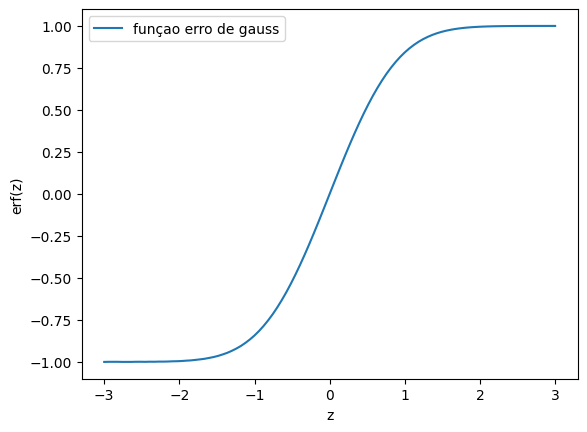

In [8]:
zezes=np.linspace(-3,3,100)
erfs=[]
for z in zezes:
  erfs.append(erf(z))

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(zezes,erfs , label='funçao erro de gauss')
ax.legend()
ax.set_xlabel('z')
ax.set_ylabel('erf(z)')
plt.show()

Vejamos agora como fica o gráfico da função erro.

*Gabarito*: Compare com o [gráfico na Wikipedia](https://pt.wikipedia.org/wiki/Fun%C3%A7%C3%A3o_erro).

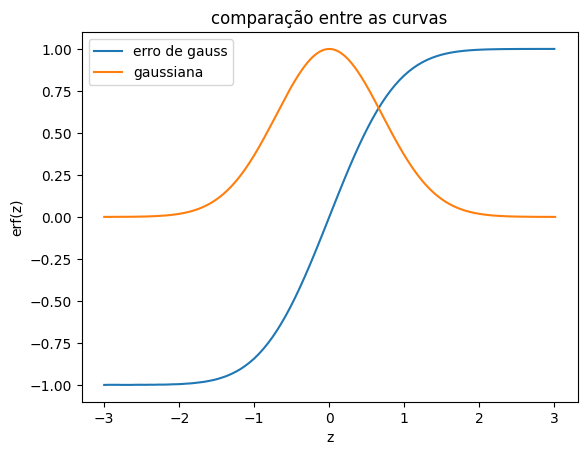

In [9]:
x=arrayfaixa(-3,3,0.01)
Y=[]
for i in x:
  Y.append(np.e**(-i**2))

fig, ax = plt.subplots()
plt.title("comparação entre as curvas")
ax.plot(zezes,erfs,label='erro de gauss')
ax.legend()
ax.set_xlabel('z')
ax.set_ylabel('erf(z)')
ax.plot(x,Y, label='gaussiana')
ax.legend()
ax.set_xlabel('z')
ax.set_ylabel('erf(z)')
plt.show()

-0.7356852966466931


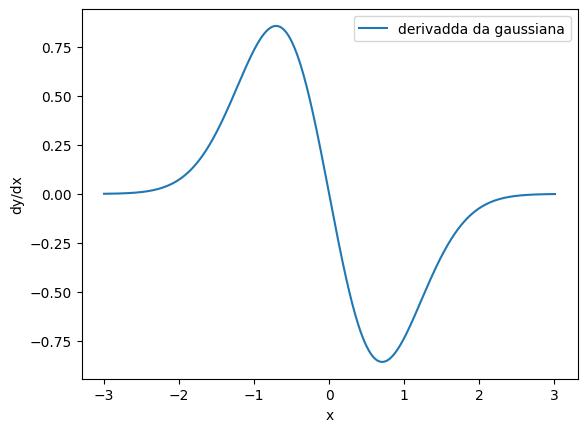

In [10]:
# só para completar, tentarei criar função para dervivadas com calculo númerico

dx=h
def f(z):
  return np.e**(-z**2)

def dy(a):
  return f(a+dx)-f(a)
def derivada(a):
  return dy(a)/dx
print(derivada(1))

D=[]
for i in x:
  D.append(derivada(i))

fig, ax = plt.subplots()
ax.plot(x,D,label='derivadda da gaussiana')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('dy/dx')
plt.show()

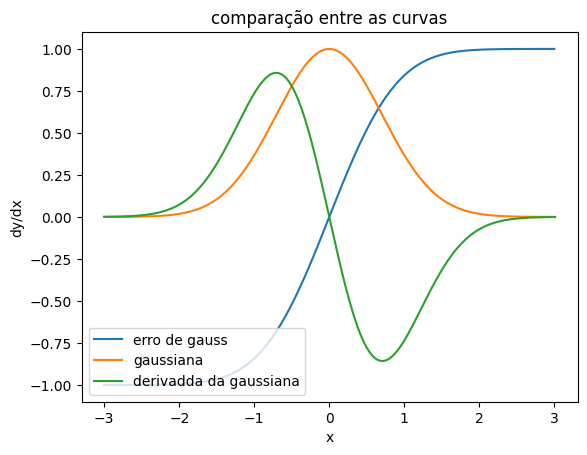

In [11]:
#tudo em uma figura só

fig, ax = plt.subplots()
plt.title("comparação entre as curvas")
ax.plot(zezes,erfs,label='erro de gauss')
ax.legend()
ax.set_xlabel('z')
ax.set_ylabel('erf(z)')
ax.plot(x,Y, label='gaussiana')
ax.legend()
ax.set_xlabel('z')
ax.set_ylabel('erf(z)')
ax.plot(x,D,label='derivadda da gaussiana')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('dy/dx')
plt.show()

0.0002 0.0020001999999994524 10.000999999997262


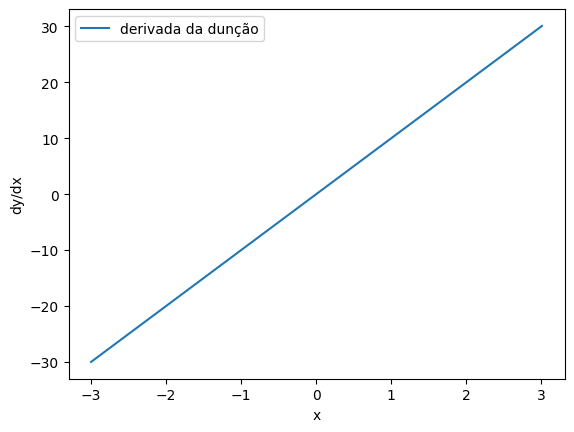

In [23]:
# uma função que me de a derivada em um ponto e outra que me de o grafico da...
#... função derviada:

# dada uma funçao no formato def f(x)://return f(x):
N=5000

def f(x):
  return 5*x**2

# funciona para qualquer função, menos a*x, sendo a uma constante. Não encontrei solução

def dx(a):
  return (a)/N
def dy(a):
  return f(a+dx(a))-f(a)
def derivada(a):
  return dy(a)/dx(a)

def grafddx():
  D=[]
  for i in x:
    D.append(derivada(i))
  import matplotlib.pyplot as plt
  fig, ax = plt.subplots()
  ax.plot(x,D,label='derivada da dunção')
  ax.legend()
  ax.set_xlabel('x')
  ax.set_ylabel('dy/dx')
  plt.show()

print(dx(1),dy(1),derivada(1))
grafddx()